In [1]:
import numpy as np
import pandas as pd
import joblib
import shap
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from feature_settings import *
from train_models import Train_Models
import torch

In [2]:
whole_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\whole_df_all_features_simple_option_return.csv"
straddle_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\straddle_df_all_features_straddle_return.csv"

In [3]:
straddle_models = Train_Models(straddle_filepath, 'straddle_return')

In [4]:
linear_model = straddle_models.linear()
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = linear_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = linear_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is linear
🔹 Training Set Metrics:
R²:   0.0827
MSE:  0.6041
MAE:  0.5879
RMSE: 0.7773
MAPE: 1.8180

🔹 Test Set Metrics:
R²:   -0.0745
MSE:  0.5758
MAE:  0.6317
RMSE: 0.7588
MAPE: 3.8243



In [5]:
lasso_params = {
    "scaler": "standard",
    "alpha": 0.8431013932082461,
    "selection": "random",
    "max_iter": 6000,
    "tol": 0.0001238513729886094,
    "fit_intercept": True,
    "random_state": 42,
    "copy_X": True,
    "warm_start": False,
    "precompute": False
}

lasso_model = straddle_models.lasso(lasso_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = lasso_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = lasso_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lasso
🔹 Training Set Metrics:
R²:   0.0000
MSE:  0.6586
MAE:  0.6187
RMSE: 0.8115
MAPE: 1.0649

🔹 Test Set Metrics:
R²:   -0.0083
MSE:  0.5403
MAE:  0.6020
RMSE: 0.7351
MAPE: 1.1510



In [6]:
ridge_params = {
    "scaler": "minmax",
    "alpha": 99.99820623812793,
    "fit_intercept": True,
    "solver": "auto",  # Let sklearn choose optimal solver
    "copy_X": True,
    "random_state": 42
}

ridge_model = straddle_models.ridge(ridge_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = ridge_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = ridge_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is ridge
🔹 Training Set Metrics:
R²:   0.0110
MSE:  0.6513
MAE:  0.6133
RMSE: 0.8070
MAPE: 1.1218

🔹 Test Set Metrics:
R²:   -0.0096
MSE:  0.5410
MAE:  0.5979
RMSE: 0.7356
MAPE: 1.2844



In [7]:
elastic_params = {
    "scaler": "minmax",
    "alpha": 1.274671157821506,
    "l1_ratio": 0.4461372443656411,
    "max_iter": 2000,
    "tol": 0.0009780337016659412,
    "selection": "random",
    "fit_intercept": True,
    "positive": False,  # Set to False unless you have domain knowledge requiring positive coefficients
    "copy_X": True,  # Always copy to avoid data modification
    "precompute": False,  # Auto-handled by sklearn, manual setting can cause conflicts
    "warm_start": False,  # Not useful in hyperparameter optimization context
    "random_state": 42  # For reproducibility
}

elastic_model = straddle_models.elastic(elastic_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = elastic_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = elastic_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is elastic
🔹 Training Set Metrics:
R²:   0.0000
MSE:  0.6586
MAE:  0.6187
RMSE: 0.8115
MAPE: 1.0649

🔹 Test Set Metrics:
R²:   -0.0083
MSE:  0.5403
MAE:  0.6020
RMSE: 0.7351
MAPE: 1.1510



In [8]:
xgb_params = {
    "scaler": "standard",
    "learning_rate": 0.010144971202424531,
    "max_depth": 4,
    "subsample": 0.7005548694043554,
    "min_child_weight": 7,
    "tree_method": "hist",
    "random_state": 42,
    "early_stopping_rounds": 50,
    "n_estimators": 10000,
}

xgb_model = straddle_models.xgb(xgb_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = xgb_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = xgb_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is xgb
🔹 Training Set Metrics:
R²:   0.0960
MSE:  0.5847
MAE:  0.5811
RMSE: 0.7647
MAPE: 1.0093

🔹 Test Set Metrics:
R²:   0.0041
MSE:  0.5337
MAE:  0.5999
RMSE: 0.7306
MAPE: 1.2748



In [9]:
lgb_params = {
    "scaler": "robust",
    "num_leaves": 25,
    "learning_rate": 0.29629303834448767,
    "n_estimators": 10000,
    "min_data_in_leaf": 55,
    "random_state": 42,
    "verbose": -1,
    "early_stopping_rounds": 50,
}


lgb_model = straddle_models.lgb(lgb_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = lgb_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = lgb_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lgb
🔹 Training Set Metrics:
R²:   0.2333
MSE:  0.4959
MAE:  0.5238
RMSE: 0.7042
MAPE: 1.0852

🔹 Test Set Metrics:
R²:   -0.0417
MSE:  0.5583
MAE:  0.6186
RMSE: 0.7472
MAPE: 2.3184



In [10]:
cat_params = {
    "scaler": "none",
    "depth": 6,
    "learning_rate": 0.2414554320781304,
    "iterations": 10000,
    "l2_leaf_reg": 3.6102526870615455,
    "loss_function": "RMSE",  # Regression loss
    "eval_metric": "RMSE",   # Evaluation metric
    "random_seed": 42,
    "allow_writing_files": False,  # Don't write temp files
    "verbose": 0,
    "early_stopping_rounds": 50,
}


cat_model = straddle_models.cat(cat_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = cat_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = cat_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is cat
🔹 Training Set Metrics:
R²:   0.2985
MSE:  0.4538
MAE:  0.5317
RMSE: 0.6736
MAPE: 1.0386

🔹 Test Set Metrics:
R²:   -0.0216
MSE:  0.5475
MAE:  0.6094
RMSE: 0.7399
MAPE: 1.4620



In [11]:
mlp_params = {
    "scaler": "standard",
    "num_layers": 6,
    "activation": "tanh",
    "first_layer_size": 192,
    "layer_1_ratio": 0.7666880719011199,
    "layer_2_ratio": 0.48684454075109973,
    "layer_3_ratio": 0.30214812565299837,
    "layer_4_ratio": 0.3606002213732059,
    "layer_5_ratio": 0.7952331653069764,
    "learning_rate": 0.007246302768929668,
    "batch_size": 32,
    "epochs": 1000,
    "dropout_rate": 0.3524627613647506,
    "weight_decay": 0.0001088270522618714,
    "batch_norm": False,
    "optimizer": "RMSprop",
    "scheduler": "ExponentialLR",
    "gamma": 0.9130351226782238
}


mlp_model = straddle_models.mlp(mlp_params)
torch.save(mlp_model.state_dict(), "my_best_model.pth")
print("=== Model saving has been done ===")
print(f"=== The current trained model is {straddle_models.model} ===")

mlp_model.eval()
with torch.no_grad():
    # Convert entire test dataset to tensor
    X_test_tensor = torch.tensor(straddle_models.get_X_test_scaled().to_numpy(), dtype=torch.float32)
    y_test_pred = mlp_model(X_test_tensor)
    y_test_pred = y_test_pred.numpy()

with torch.no_grad():
    # Convert entire train dataset to tensor
    X_train_tensor = torch.tensor(straddle_models.get_X_train_scaled().to_numpy(), dtype=torch.float32)
    y_train_pred = mlp_model(X_train_tensor)
    y_train_pred = y_train_pred.numpy()

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\55479\PycharmProjects\MS_thesis\.venv\lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  3%|▎         | 28/1000 [00:06<03:30,  4.63it/s]

=== Model saving has been done ===
=== The current trained model is mlp ===
🔹 Training Set Metrics:
R²:   -0.0270
MSE:  0.6643
MAE:  0.6369
RMSE: 0.8151
MAPE: 1.1951

🔹 Test Set Metrics:
R²:   -0.0060
MSE:  0.5391
MAE:  0.6163
RMSE: 0.7342
MAPE: 1.6623



In [12]:
feature_names = list(straddle_models.X.columns)

def model_predict(x):
    mlp_model.eval()
    with torch.no_grad():
        x_tensor = torch.tensor(x, dtype=torch.float32)
        return mlp_model(x_tensor).numpy()

X_train_scaled, X_val_scaled, X_test_scaled = straddle_models.scale_transform_tree_nn(mlp_params)

# Create explainer
explainer = shap.Explainer(model_predict, X_train_scaled.to_numpy())  # Use numpy array

# Get SHAP values
shap_values = explainer(X_test_scaled.to_numpy())

# Create DataFrame with feature names for plotting
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Plot with feature names
shap.summary_plot(shap_values, X_test_scaled.to_numpy(), feature_names=feature_names)

KeyboardInterrupt: 

C:\Users\55479\AppData\Local\Temp\ipykernel_11104\2826873183.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled.to_numpy(), plot_type='bar', feature_names=feature_names, show=True)


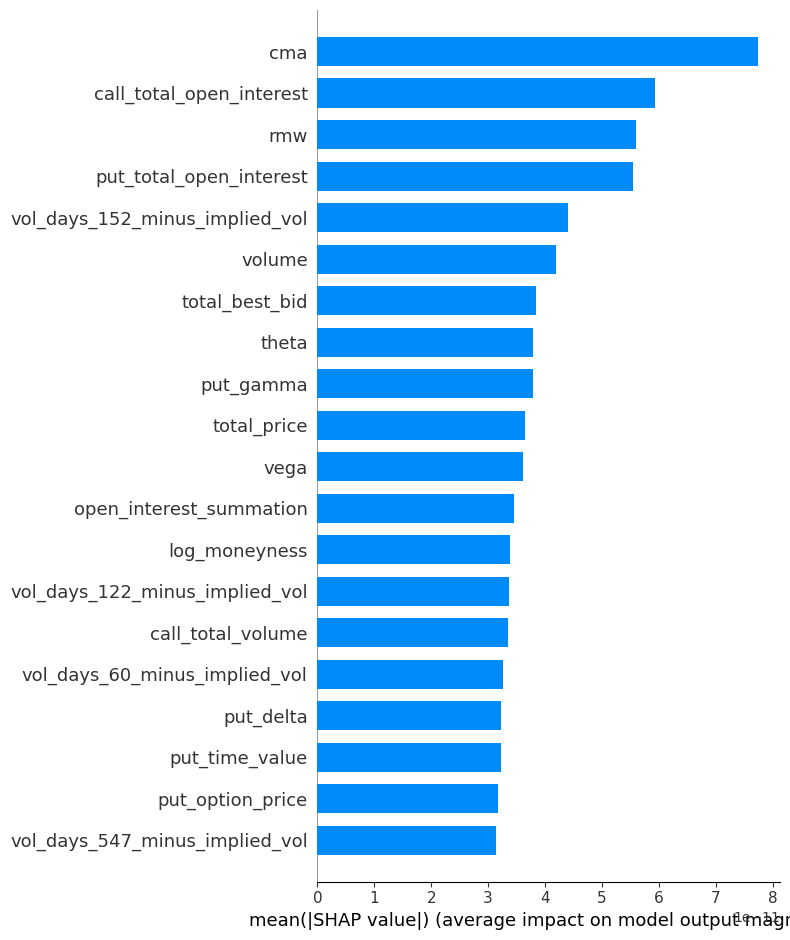

In [ ]:
import shap
import matplotlib.pyplot as plt

# Or use the older syntax
shap.summary_plot(shap_values, X_test_scaled.to_numpy(), plot_type='bar', feature_names=feature_names, )

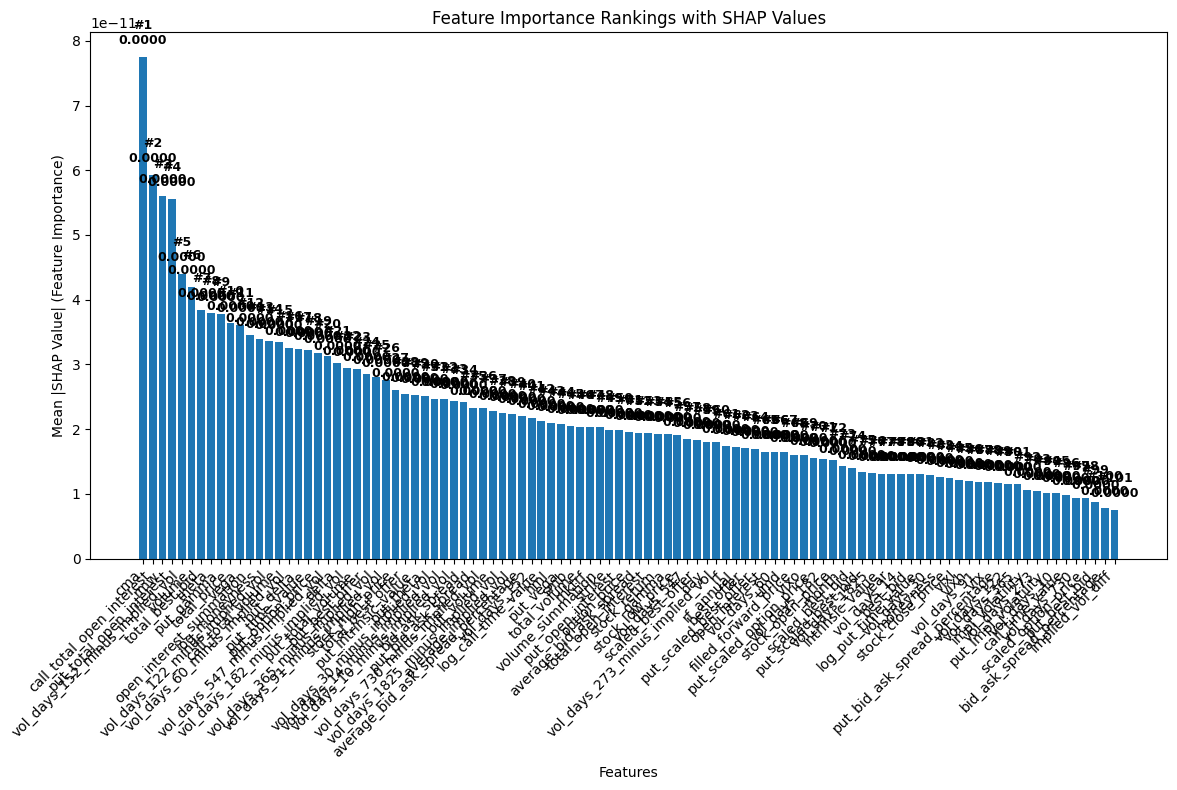

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean absolute SHAP values
feature_importance = np.abs(shap_values.values).mean(0)

# Create DataFrame with rankings
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Add ranking
importance_df['rank'] = range(1, len(importance_df) + 1)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(importance_df['feature'], importance_df['importance'])

# Add SHAP values AND rankings on bars
for i, (bar, value, rank) in enumerate(zip(bars, importance_df['importance'], importance_df['rank'])):
    # Show both rank and SHAP value
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + max(importance_df['importance']) * 0.02,
             f'#{rank}\n{value:.4f}',  # Rank and SHAP value
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.xlabel('Features')
plt.ylabel('Mean |SHAP Value| (Feature Importance)')
plt.title('Feature Importance Rankings with SHAP Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# If you have shap_values as a numpy array or DataFrame-like structure:
# For tree-based models: shap_values.values is (num_samples, num_features)
shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Compute mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_array).mean(axis=0)

# Create a DataFrame
shap_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap
})

# Sort by importance descending
shap_importance = shap_importance.sort_values('importance', ascending=False).reset_index(drop=True)

print(shap_importance)


                            feature    importance
0                               cma  7.742924e-11
1          call_total_open_interest  5.930395e-11
2                               rmw  5.604641e-11
3           put_total_open_interest  5.554525e-11
4    vol_days_152_minus_implied_vol  4.401857e-11
..                              ...           ...
96                     vol_days_730  9.354989e-12
97              scaled_option_price  9.354989e-12
98                     put_best_bid  8.770303e-12
99        bid_ask_spread_percentage  7.767982e-12
100                implied_vol_diff  7.517402e-12

[101 rows x 2 columns]
